In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molsysmt as msm

## Get Ramachandran angles

Getting the $\phi$ and $\psi$ dihedral angles of a protein it is almost straightfoward with the above method. But to solve this task even more easily, MolSysMT includes a method called `molsysmt.ramachandran_angles`. Lets see how it works. But first lets load molecular system with more than a frame:

In [3]:
traj_file = msm.demo['pentalanine']['traj.h5']
molecular_system = msm.convert(traj_file, to_form='molsysmt.MolSys')
msm.info(molecular_system)

/home/diego/Myopt/miniconda3/envs/MolSysMT/lib/python3.7/site-packages/tables/leaf.py:544: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  key = numpy.array(key)


form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_peptides,n_frames
molsysmt.MolSys,62,7,1,1,1,1,1,5000


In [4]:
phi_chains, psi_chains, phi_angles, psi_angles = msm.structure.get_ramachandran_angles(molecular_system)

The method returns four objects, the covalent chains defining the $\phi$ and $\psi$ dihedral angles and two additional objects with the corresponding values for each angle per frame:

In [5]:
phi_chains.shape

(5, 4)

In [6]:
phi_angles.shape

(5000, 5)

The method also includes the posibility to limit the calculation of the ramachandran angles to an atoms selection over the molecular system:

In [7]:
phi_chains, psi_chains, phi_angles, psi_angles = msm.structure.get_ramachandran_angles(molecular_system,
                                                                         selection='group_index==[1,2]')

Now the ramachandran map can be plot using the algorithm you like best: 

/home/diego/Myopt/miniconda3/envs/MolSysMT/lib/python3.7/site-packages/pandas/core/construction.py:564: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  data = np.asarray(data)


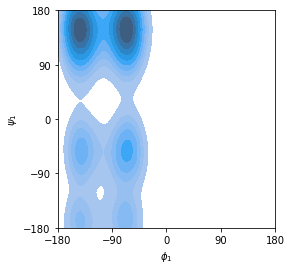

In [8]:
import seaborn as sns

ax = sns.kdeplot(x=phi_angles[:,0], y=psi_angles[:,0], shade=True)
ax.set_xlim(-180.0,180.0)
ax.set_ylim(-180.0,180.0)
ax.set_xticks([-180.0, -90.0, 0.0, 90.0, 180.0])
ax.set_yticks([-180.0, -90.0, 0.0, 90.0, 180.0])
ax.set_xlabel('$\phi_1$')
ax.set_ylabel('$\psi_1$')
ax.set_aspect('equal')